<a href="https://colab.research.google.com/github/melenjefaridxdd/Farid-Melenje/blob/main/semana3/TallerRedesNeuronalesFarid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfdata = pd.read_csv('/content/heart.csv')

In [3]:
dfdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dfdata.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
dfdata.count()

,0
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


In [6]:
dfdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dfdata.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
dfdata.target.unique()

array([0, 1])

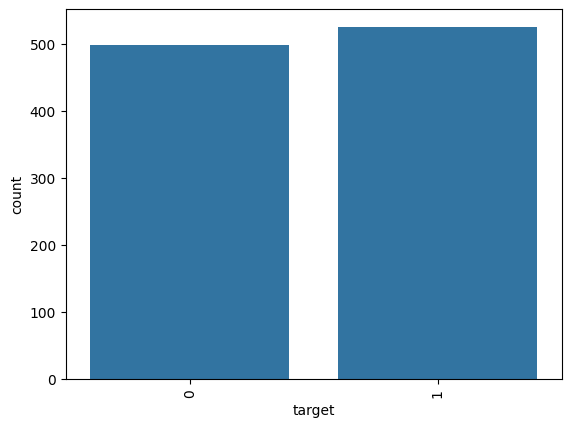

In [10]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'],rotation='vertical')
plt.show()

In [14]:
dfdata[dfdata['target']==1].count()

,0
age,526
sex,526
cp,526
trestbps,526
chol,526
fbs,526
restecg,526
thalach,526
exang,526
oldpeak,526


In [17]:
from sklearn.utils import resample

dfdata2 = pd.DataFrame()
for i in range(2):
  df_aux = dfdata[dfdata.target == i]
  df_aux = resample(df_aux, n_samples=499, random_state=2)
  dfdata2 = pd.concat([dfdata2,df_aux])

dfdata2.target.value_counts()

,count
target,
0,499
1,499


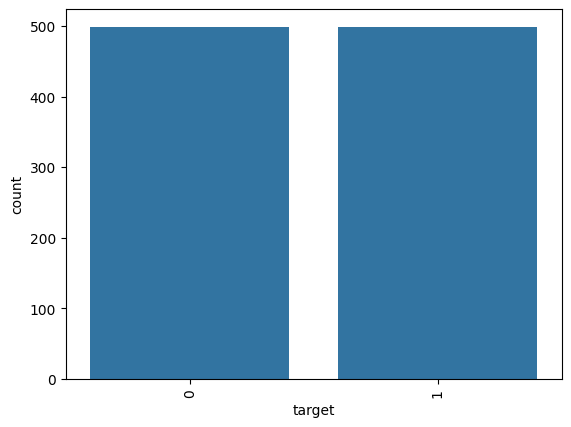

In [18]:
sns.countplot(x='target',data=dfdata2)
plt.xticks(x=dfdata2['target'],rotation='vertical')
plt.show()

In [19]:
dfdata2.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
364,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0


In [20]:
X = dfdata2.drop(['target'], axis =1)
Y = dfdata2['target']

X = np.asarray(X)
Y = np.asarray(Y)
print(X.shape)
print(Y.shape)

(998, 13)
(998,)


In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(798, 13)
(798,)
(200, 13)
(200,)


In [22]:
Ytest

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(Ytrain).reshape(-1, 1))

y_train = enc.transform(np.asarray(Ytrain).reshape(-1, 1)).toarray()
y_test = enc.transform(np.asarray(Ytest).reshape(-1, 1)).toarray()

y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(256, input_shape=(Xtrain.shape[1],), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 131,158 (512.34 KB)

 Trainable params: 131,158 (512.34 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(Xtrain, y_train, epochs=15, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 492ms/step - accuracy: 0.5005 - loss: 0.6914 - val_accuracy: 0.4125 - val_loss: 0.6924
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4976 - loss: 0.6919 - val_accuracy: 0.4125 - val_loss: 0.6911
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5383 - loss: 0.6893 - val_accuracy: 0.4125 - val_loss: 0.6883
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5657 - loss: 0.6865 - val_accuracy: 0.7125 - val_loss: 0.6843
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5238 - loss: 0.6872 - val_accuracy: 0.7250 - val_loss: 0.6850
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5984 - loss: 0.6821 - val_accuracy: 0.7000 - val_loss: 0.6786
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6500 - loss: 0.6736 - val_accuracy: 0.7250 - val_loss: 0.6793
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 0.6727 - val_accuracy: 0.6750 - val_l

In [30]:
model.save('FaridRed.h5')

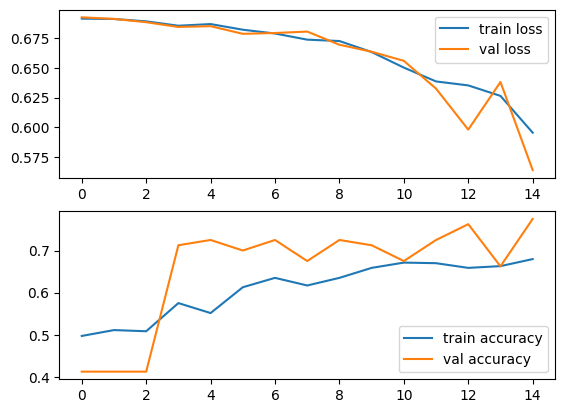

In [39]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val accuracy'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.

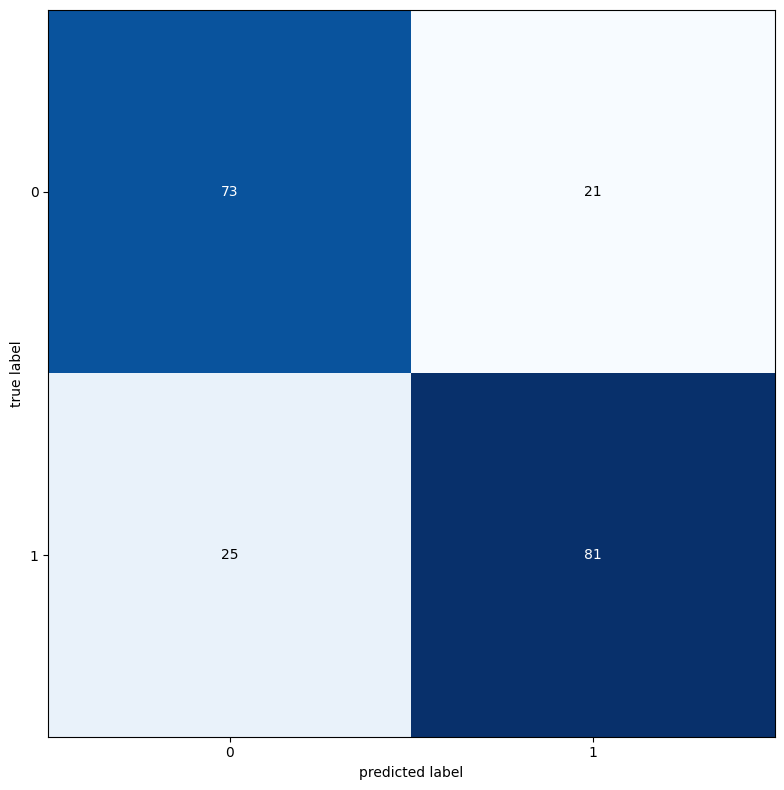

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(Xtest)
print(y_test)

matriz = confusion_matrix(y_test.argmax(axis=1), ypred.argmax(axis=1))

plot_confusion_matrix(conf_mat=matriz, figsize=(8,8), show_normed=False)
plt.tight_layout()

#print(metrics.classification_report(y_test.argmax(ypred, axis=1), digits=4)